## INDIA

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers import LST
from keras.models import Sequential

from tensorflow.keras.layers import LSTM


2023-05-31 17:18:42.201830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 17:18:42.275745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-31 17:18:42.276850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 17:18:43.726180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv("Southern Region.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

             Datetime Month  Year       Date  Consumption    Solar     Wind  \
0  2018-4-10 15:58:04   Apr  2018  Apr, 2018   25064.6144  1755.45  1165.94   
1  2018-5-26 11:59:40   May  2018  May, 2018   25064.6144  1840.76  1371.57   

   Others (Biomass, Bagasse, Small Hydel, Etc.)  \
0                                        277.47   
1                                        202.94   

   Total RE Generated (Energy Saved)  Cost Saved (IN Crores)  
0                            3198.86               166.34072  
1                            3415.27               177.59404   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Datetime                                      57 non-null     object 
 1   Month                                

In [4]:
# Select only the two columns of interest
selected_columns = ['Datetime','Consumption', 'Total RE Generated (Energy Saved)']
dff = df[selected_columns]

# Print the resulting dataframe
# print(dff)

print("="*50)
print("First Five Rows ","\n")
print(dff.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(dff.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(dff.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(dff.isnull().sum(),"\n")

First Five Rows  

             Datetime  Consumption  Total RE Generated (Energy Saved)
0  2018-4-10 15:58:04   25064.6144                            3198.86
1  2018-5-26 11:59:40   25064.6144                            3415.27 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Datetime                           57 non-null     object 
 1   Consumption                        57 non-null     float64
 2   Total RE Generated (Energy Saved)  57 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB
None 

Describe the Dataset  

        Consumption  Total RE Generated (Energy Saved)
count     57.000000                          57.000000
mean   26737.841640                        5963.931579
std      807.954481                        1768.516309
min    25064.614

In [5]:
# Extract all Data Like Year MOnth Day Time etc
datasett = df
dataset = dff
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = dff.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

/tmp/ipykernel_5902/2799729664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
/tmp/ipykernel_5902/2799729664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
/tmp/ipykernel_5902/2799729664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-10 15:58:04,25064.6144,3198.86,4,2018,2018-04-10,15:58:04,15,Tuesday


In [6]:
dataset

,Consumption,Total RE Generated (Energy Saved),Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,
2018-04-10 15:58:04,25064.61440,3198.86,4,2018,2018-04-10,15:58:04,15,Tuesday
2018-05-26 11:59:40,25064.61440,3415.27,5,2018,2018-05-26,11:59:40,21,Saturday
2018-06-15 08:03:27,25064.61440,5897.46,6,2018,2018-06-15,08:03:27,24,Friday
2018-07-11 03:53:53,25064.61440,8434.26,7,2018,2018-07-11,03:53:53,28,Wednesday
2018-08-13 19:56:01,25064.61440,9387.27,8,2018,2018-08-13,19:56:01,33,Monday
2018-09-05 11:48:03,25064.61440,6258.82,9,2018,2018-09-05,11:48:03,36,Wednesday
2018-10-05 02:46:35,25064.61440,4414.11,10,2018,2018-10-05,02:46:35,40,Friday
2018-11-18 04:38:12,25064.61440,3762.80,11,2018,2018-11-18,04:38:12,46,Sunday
2018-12-12 07:00:44,25064.61440,3778.92,12,2018,2018-12-12,07:00:44,50,Wednesday


In [7]:
# How many Unique Year do we Have in Dataset 
print(dff.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2018 2019 2020 2021 2022] 

Total Number of Unique Year 5 



In [8]:
## ValueError: cannot reindex on an axis with duplicate labels
dataset = dataset.loc[~dataset.index.duplicated()]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

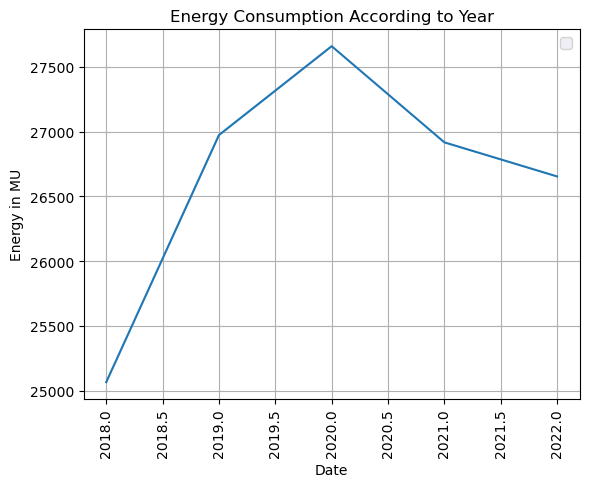

In [9]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Consumption"], data=dff)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2018")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/tmp/ipykernel_5902/3148789202.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_5902/3148789202.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2018 = dataset["2018"]["Date"].to_list()
/tmp/ipykernel_5902/3148789202.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_5902/3148789202.py:20: FutureWarning: I

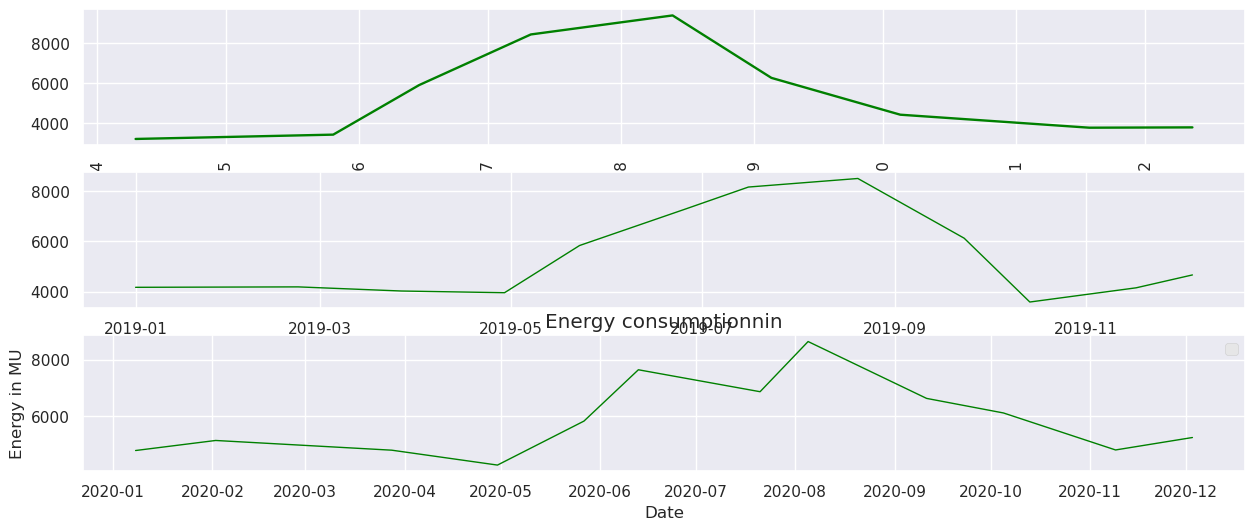

In [10]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)
# ax4= fig.add_subplot(313)
# ax5= fig.add_subplot(313)

style.use('ggplot')

y_2018 = dataset["2018"]["Total RE Generated (Energy Saved)"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax1.plot(x_2018,y_2018, color="green", linewidth=1.7)


y_2019 = dataset["2019"]["Total RE Generated (Energy Saved)"].to_list()
x_2019 = dataset["2019"]["Date"].to_list()
ax2.plot(x_2019, y_2019, color="green", linewidth=1)


y_2020 = dataset["2020"]["Total RE Generated (Energy Saved)"].to_list()
x_2020 = dataset["2020"]["Date"].to_list()
ax3.plot(x_2020, y_2020, color="green", linewidth=1)


# y_2021 = dataset["2021"]["Total RE Generated (Energy Saved)"].to_list()
# x_2021 = dataset["2021"]["Date"].to_list()
# ax4.plot(x_2021, y_2021, color="green", linewidth=1)


# y_2022 = dataset["2022"]["Total RE Generated (Energy Saved)"].to_list()
# x_2022 = dataset["2022"]["Date"].to_list()
# ax5.plot(x_2022, y_2022, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MU")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_5902/1231461587.py:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
/tmp/ipykernel_5902/1231461587.py:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_re = dataset[year]["Date"].to_list()
/tmp/ipykernel_5902/1231461587.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.l

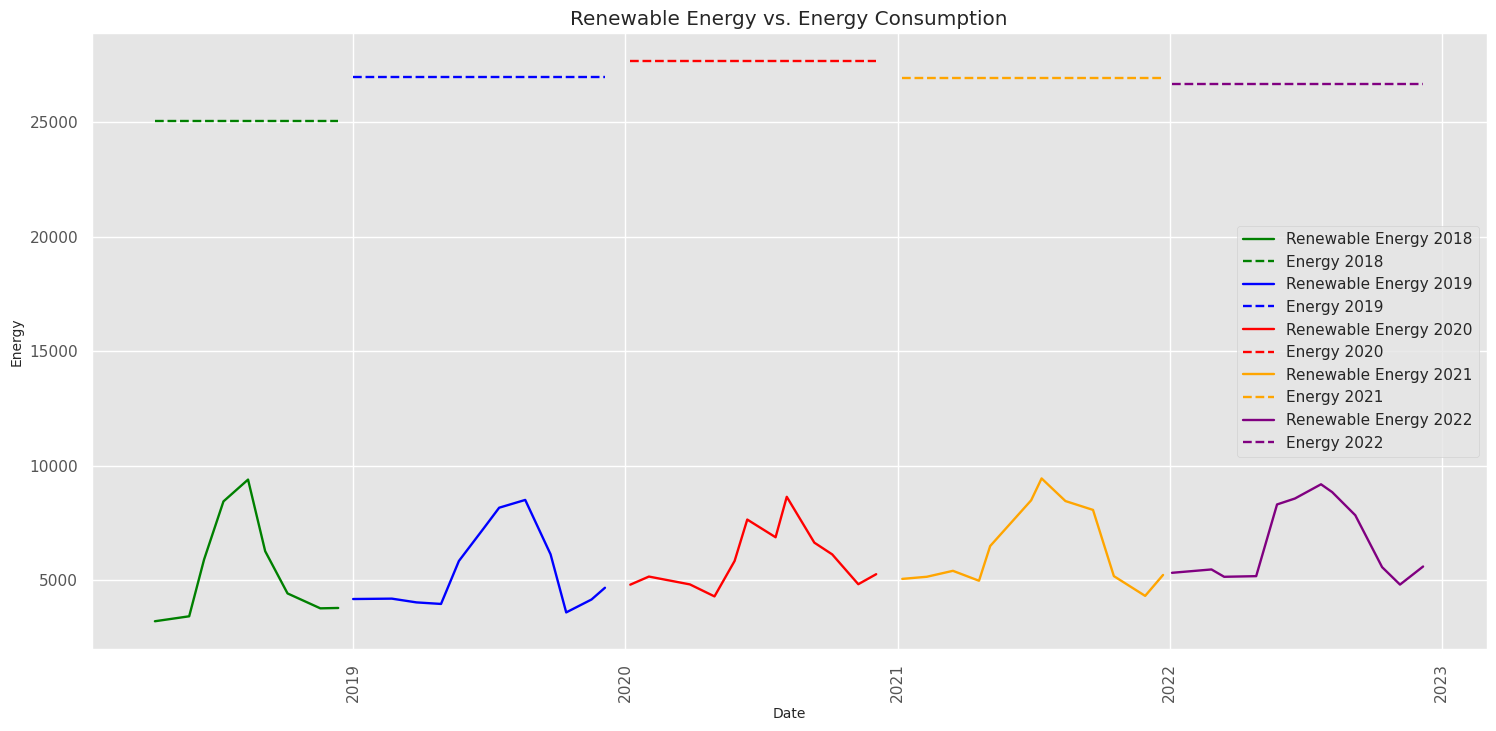

In [11]:
from matplotlib import style

style.use('ggplot')

years = ["2018", "2019", "2020", "2021", "2022"]
colors = ["green", "blue", "red", "orange", "purple"]

plt.xlabel("Date")
plt.ylabel("Energy")
plt.title("Renewable Energy vs. Energy Consumption")
plt.grid(True, alpha=1)
plt.xticks(rotation=90)
plt.legend()

for i, year in enumerate(years):
    y_re = dataset[year]["Total RE Generated (Energy Saved)"].to_list()
    x_re = dataset[year]["Date"].to_list()

    y_consumption = dataset[year]["Consumption"].to_list()
    x_consumption = dataset[year]["Date"].to_list()

    plt.plot(x_re, y_re, color=colors[i], linewidth=1.7, label=f"Renewable Energy {year}")
    plt.plot(x_consumption, y_consumption, color=colors[i], linewidth=1.7, linestyle="--", label=f"Energy {year}")

plt.rcParams["figure.figsize"] = (18, 8)
plt.legend()
plt.show()


## Energy Distribution

/tmp/ipykernel_5902/1842333175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Consumption Energy Distribution [MU]')

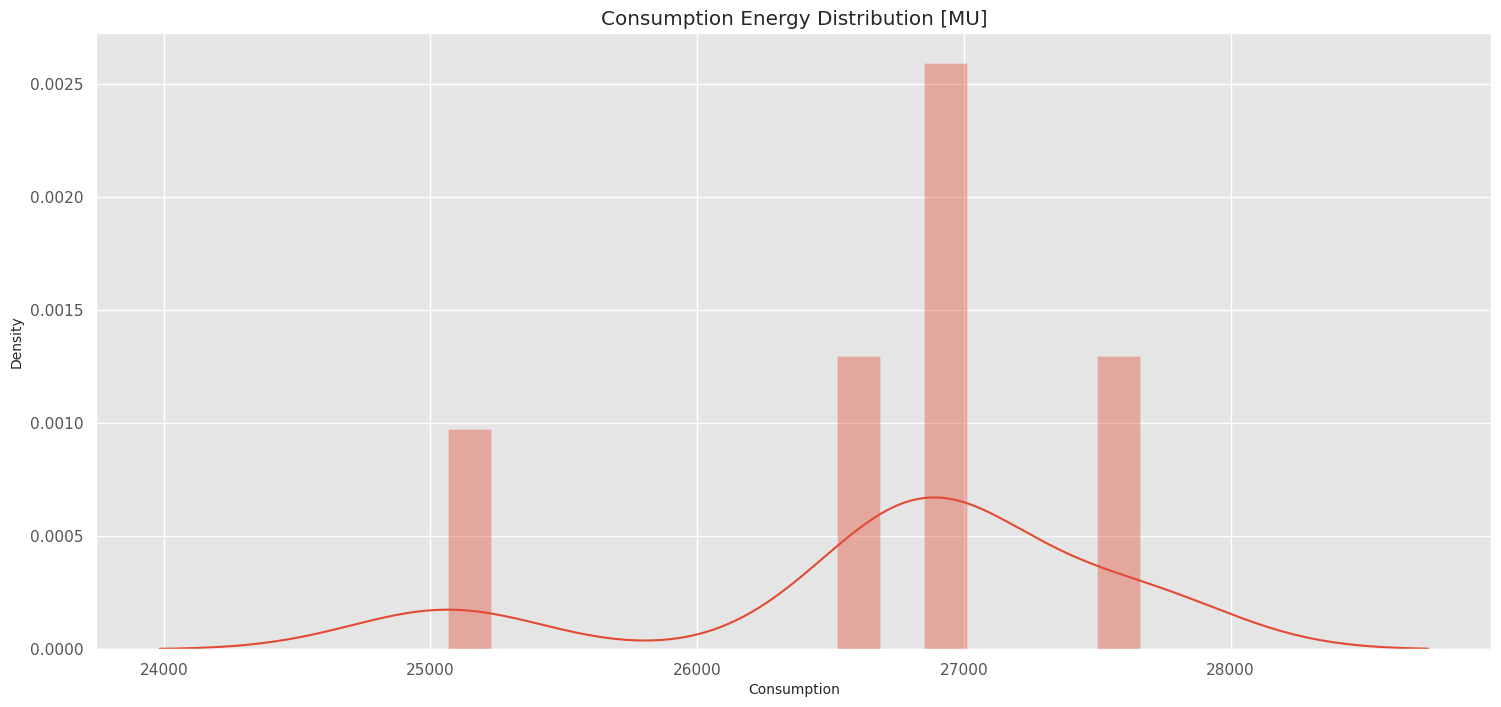

In [12]:
sns.distplot(dataset["Consumption"])
plt.title("Consumption Energy Distribution [MU]")

/tmp/ipykernel_5902/4102279045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total RE Generated (Energy Saved)"])


Text(0.5, 1.0, 'Renewable Energy Distribution [MU]')

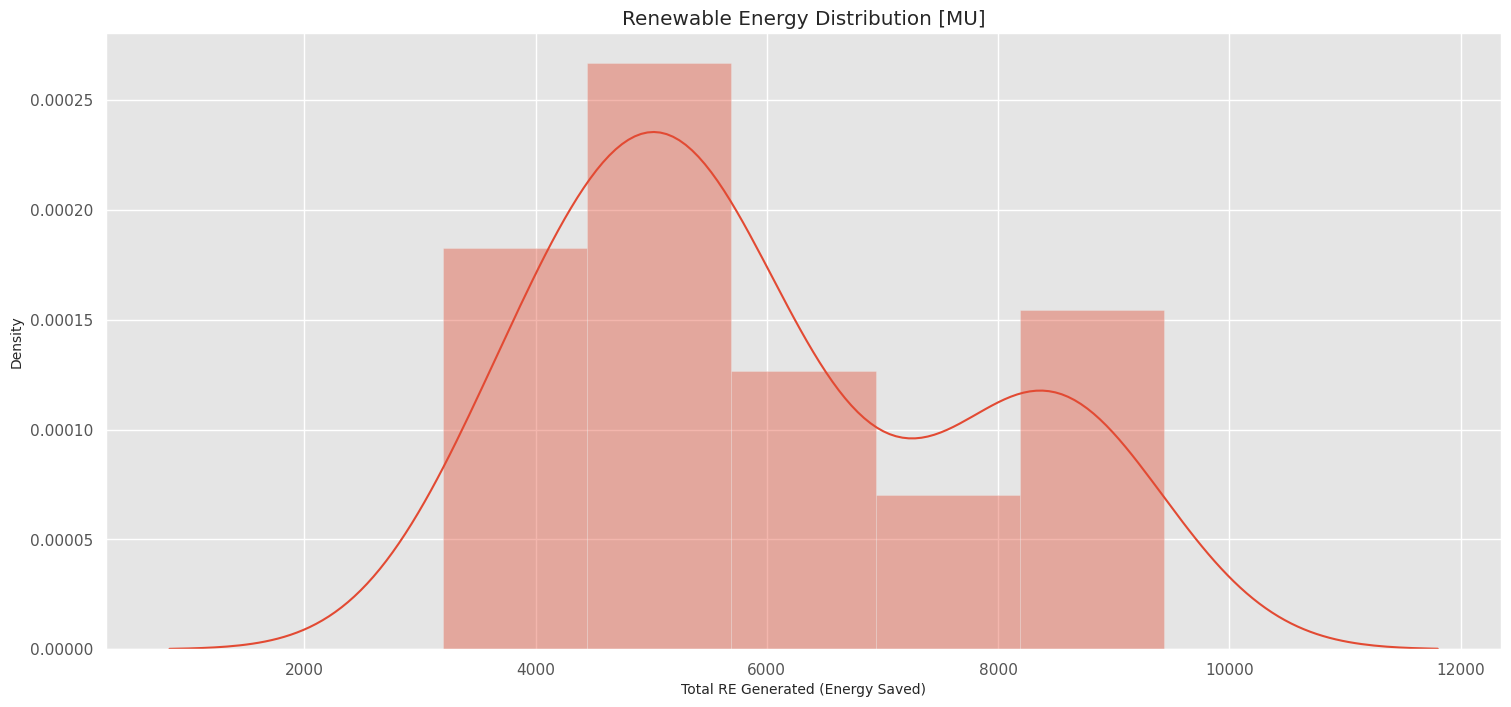

In [13]:
sns.distplot(dataset["Total RE Generated (Energy Saved)"])
plt.title("Renewable Energy Distribution [MU]")

## Energy with Respect to Time

In [14]:
# df
# dataset
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M:%S')
# dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


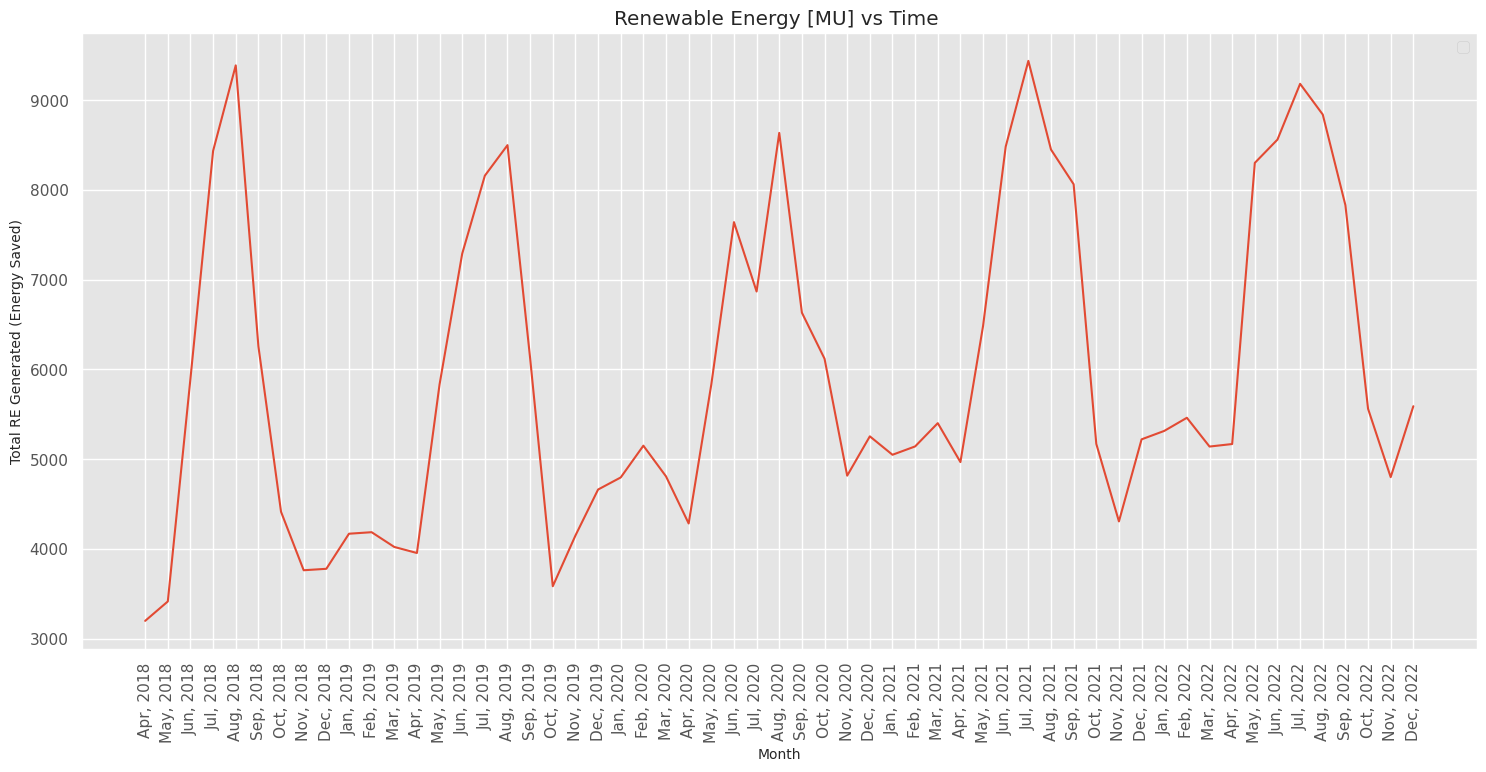

In [15]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Total RE Generated (Energy Saved)"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Renewable Energy [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


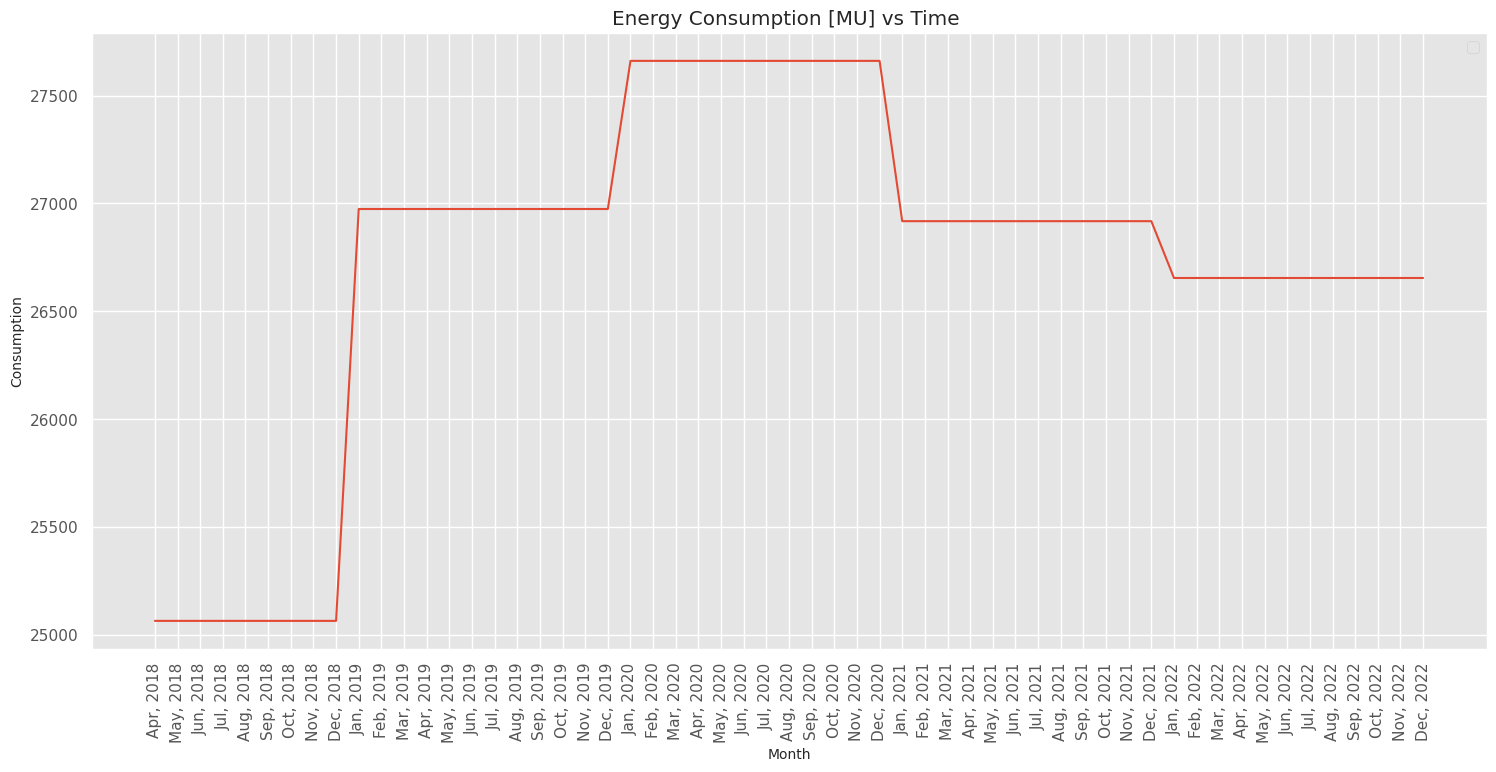

In [16]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=datasett["Date"],y=datasett["Consumption"], data=df)
# plt.plot(dataset["Time"], dataset["Consumption"])
plt.title("Energy Consumption [MU] vs Time ")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

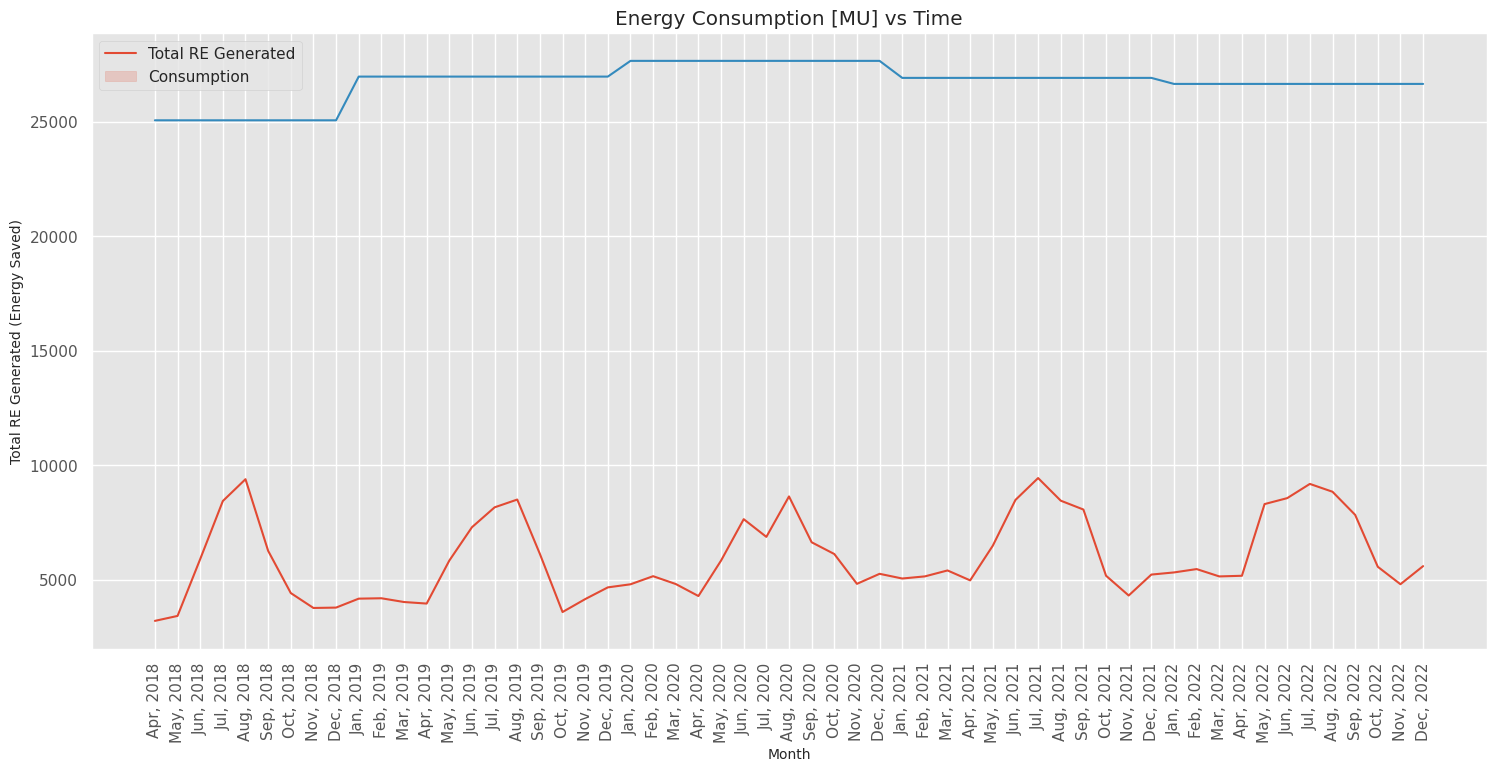

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x=datasett["Date"], y=datasett["Total RE Generated (Energy Saved)"], data=df, ax=ax1)
sns.lineplot(x=datasett["Date"], y=datasett["Consumption"], data=df, ax=ax1)

plt.title("Energy Consumption [MU] vs Time")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend(["Total RE Generated", "Consumption"])

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


## Resampleing Data
Consumption only

In [18]:
NewDataSet = dataset.resample('D').mean()

/tmp/ipykernel_5902/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [19]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.61440,3198.86,4.0,2018.0,15.0
2018-04-11,NaN,NaN,NaN,NaN,NaN
2018-04-12,NaN,NaN,NaN,NaN,NaN
2018-04-13,NaN,NaN,NaN,NaN,NaN
2018-04-14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-03,NaN,NaN,NaN,NaN,NaN
2022-12-04,NaN,NaN,NaN,NaN,NaN
2022-12-05,NaN,NaN,NaN,NaN,NaN


In [20]:
# Load the dataframe
# df = pd.read_csv('your_data.csv')
df = NewDataSet
# Convert the 'Datetime' column to datetime format
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the dataframe by the 'Datetime' column
df = df.sort_values('Datetime')

# Forward fill the NaN values in the 'Month', 'Year', and 'Week' columns
df['Month'] = df['Month'].fillna(method='ffill')
df['Year'] = df['Year'].fillna(method='ffill')
df['Week'] = df['Week'].fillna(method='ffill')

# Print the updated dataframe
NewDataSet = df


In [21]:
NewDataSet

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.61440,3198.86,4.0,2018.0,15.0
2018-04-11,NaN,NaN,4.0,2018.0,15.0
2018-04-12,NaN,NaN,4.0,2018.0,15.0
2018-04-13,NaN,NaN,4.0,2018.0,15.0
2018-04-14,NaN,NaN,4.0,2018.0,15.0
...,...,...,...,...,...
2022-12-03,NaN,NaN,11.0,2022.0,44.0
2022-12-04,NaN,NaN,11.0,2022.0,44.0
2022-12-05,NaN,NaN,11.0,2022.0,44.0


In [22]:
df = NewDataSet

In [23]:
import numpy as np
import pandas as pd

# Calculate the mean and standard deviation of the electricity consumption column
mean = df['Consumption'].mean()
std = df['Consumption'].std()

# Set the range for random values (e.g., within 1 standard deviation of the mean)
lower_limit = mean - std
upper_limit = mean + std

# Generate random values within the specified range
random_values = np.random.uniform(lower_limit, upper_limit, df['Consumption'].isnull().sum())

# Replace NaN values with the generated random values
df.loc[df['Consumption'].isnull(), 'Consumption'] = random_values

# Print the updated DataFrame
df

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2018-04-10,25064.614400,3198.86,4.0,2018.0,15.0
2018-04-11,27433.739002,NaN,4.0,2018.0,15.0
2018-04-12,27230.225255,NaN,4.0,2018.0,15.0
2018-04-13,26822.156959,NaN,4.0,2018.0,15.0
2018-04-14,26522.259750,NaN,4.0,2018.0,15.0
...,...,...,...,...,...
2022-12-03,26081.324031,NaN,11.0,2022.0,44.0
2022-12-04,27417.228824,NaN,11.0,2022.0,44.0
2022-12-05,27163.116362,NaN,11.0,2022.0,44.0


In [24]:
df.shape
NewDataSet = df

In [25]:
print("Old Dataset ",dataset.shape)
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (57, 8)
New  Dataset  (1703, 5)


In [26]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [27]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1643, 1)
Test Set Shape  (100, 5)


In [28]:
print(Training_Set)

             Consumption
Datetime                
2018-04-10  25064.614400
2018-04-11  27433.739002
2018-04-12  27230.225255
2018-04-13  26822.156959
2018-04-14  26522.259750
...                  ...
2022-10-04  26018.397593
2022-10-05  27360.222956
2022-10-06  27475.643176
2022-10-07  26912.047178
2022-10-08  26516.344050

[1643 rows x 1 columns]


In [29]:
print(TestData)

             Consumption  Total RE Generated (Energy Saved)  Month    Year  \
Datetime                                                                     
2022-08-30  26349.725640                                NaN    8.0  2022.0   
2022-08-31  26994.435235                                NaN    8.0  2022.0   
2022-09-01  26829.809892                                NaN    8.0  2022.0   
2022-09-02  27360.928673                                NaN    8.0  2022.0   
2022-09-03  26568.170443                                NaN    8.0  2022.0   
...                  ...                                ...    ...     ...   
2022-12-03  26081.324031                                NaN   11.0  2022.0   
2022-12-04  27417.228824                                NaN   11.0  2022.0   
2022-12-05  27163.116362                                NaN   11.0  2022.0   
2022-12-06  26036.038501                                NaN   11.0  2022.0   
2022-12-07  26654.180280                            5590.14   12

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [32]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1583, 60, 1)
(1583, 1)


In [33]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1583, 60, 1)

## Model

In [34]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

2023-05-31 17:21:43.730796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 17:21:43.734491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 17:21:43.736590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

Epoch 1/1000


2023-05-31 17:21:50.392524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 17:21:50.395623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 17:21:50.397917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 14s 151ms/step - loss: 0.1062
Epoch 2/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0413
Epoch 3/1000
25/25 [==============================] - 4s 159ms/step - loss: 0.0378
Epoch 4/1000
25/25 [==============================] - 4s 161ms/step - loss: 0.0368
Epoch 5/1000
25/25 [==============================] - 4s 150ms/step - loss: 0.0374
Epoch 6/1000
25/25 [==============================] - 4s 156ms/step - loss: 0.0374
Epoch 7/1000
25/25 [==============================] - 4s 168ms/step - loss: 0.0378
Epoch 8/1000
25/25 [==============================] - 4s 159ms/step - loss: 0.0376
Epoch 9/1000
25/25 [==============================] - 4s 157ms/step - loss: 0.0379
Epoch 10/1000
25/25 [==============================] - 4s 179ms/step - loss: 0.0368
Epoch 11/1000
25/25 [==============================] - 4s 158ms/step - loss: 0.0371
Epoch 12/1000
25/25 [==============================] - 4s 154ms/step - loss: 0.0365
Epoch 13/1000

In [37]:
# regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

## Test Data

In [38]:
TestData.head(2)

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-09-08,98718.300380,NaN,8.0,2022.0,34.0
2022-09-09,101505.223629,NaN,8.0,2022.0,34.0


In [39]:
TestData.shape

(100, 5)

In [40]:
NewDataSet.shape

(1696, 5)

In [41]:
# non_zero_rows = TestData.dropna().loc[(TestData != 0).all(axis=1)]
# print(non_zero_rows)

In [42]:
Df_Total = pd.concat((NewDataSet[["Consumption"]], TestData[["Consumption"]]), axis=0)

In [43]:
Df_Total.shape

(1796, 1)

In [44]:
Df_Total

,Consumption
Datetime,
2018-04-26,93618.904760
2018-04-27,102449.444438
2018-04-28,102157.608555
2018-04-29,97700.183175
2018-04-30,100392.425486
...,...
2022-12-12,101376.788900
2022-12-13,100265.568658
2022-12-14,97737.389813


In [45]:
Df_Total.fillna(0, inplace=True)

In [46]:
Df_Total

,Consumption
Datetime,
2018-04-26,93618.904760
2018-04-27,102449.444438
2018-04-28,102157.608555
2018-04-29,97700.183175
2018-04-30,100392.425486
...,...
2022-12-12,101376.788900
2022-12-13,100265.568658
2022-12-14,97737.389813


In [47]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [48]:
inputs

array([[100061.81451111],
       [102782.67045669],
       [101332.64085725],
       [ 98015.31652319],
       [ 99138.28944539],
       [ 98483.31291645],
       [100188.23896777],
       [100243.5895    ],
       [101493.61444796],
       [ 99447.18869282],
       [ 98928.04109528],
       [ 98552.79549921],
       [100141.63703766],
       [103304.33015715],
       [103621.91423973],
       [ 99745.26217744],
       [103034.73844526],
       [ 97785.22766356],
       [100243.5895    ],
       [100595.01694747],
       [100436.9410675 ],
       [ 99048.05443538],
       [101464.75736656],
       [101830.89888264],
       [101335.33410587],
       [ 99222.97259903],
       [101300.61277735],
       [ 98009.68472957],
       [100848.00482739],
       [ 99328.80241017],
       [ 97945.42580232],
       [ 99116.35076838],
       [103508.36821263],
       [100208.31108159],
       [103560.22159003],
       [ 99857.65550592],
       [100236.44237025],
       [100143.87981096],
       [1031

In [56]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 1s 248ms/step


In [57]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = predicted_stock_price
dates = TestData.index.to_list()

In [51]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMillionUnits": True_MillionUnits,
    "PredictedMillionUnits":[x[0] for x in Predicted_MillionUnits ]
})

## Future Predicted

In [52]:
Machine_Df

,Date,TrueMillionUnits,PredictedMillionUnits
0,2022-09-08,98718.300380,98114.195312
1,2022-09-09,101505.223629,99608.867188
2,2022-09-10,101248.217605,98253.171875
3,2022-09-11,101838.827202,98082.773438
4,2022-09-12,101378.098641,99444.890625
...,...,...,...
95,2022-12-12,101376.788900,98250.648438
96,2022-12-13,100265.568658,98489.257812
97,2022-12-14,97737.389813,101807.187500
98,2022-12-15,101712.367660,102586.867188


In [53]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits  = [x[0] for x in Predicted_MillionUnits ]
dates = TestData.index.to_list()

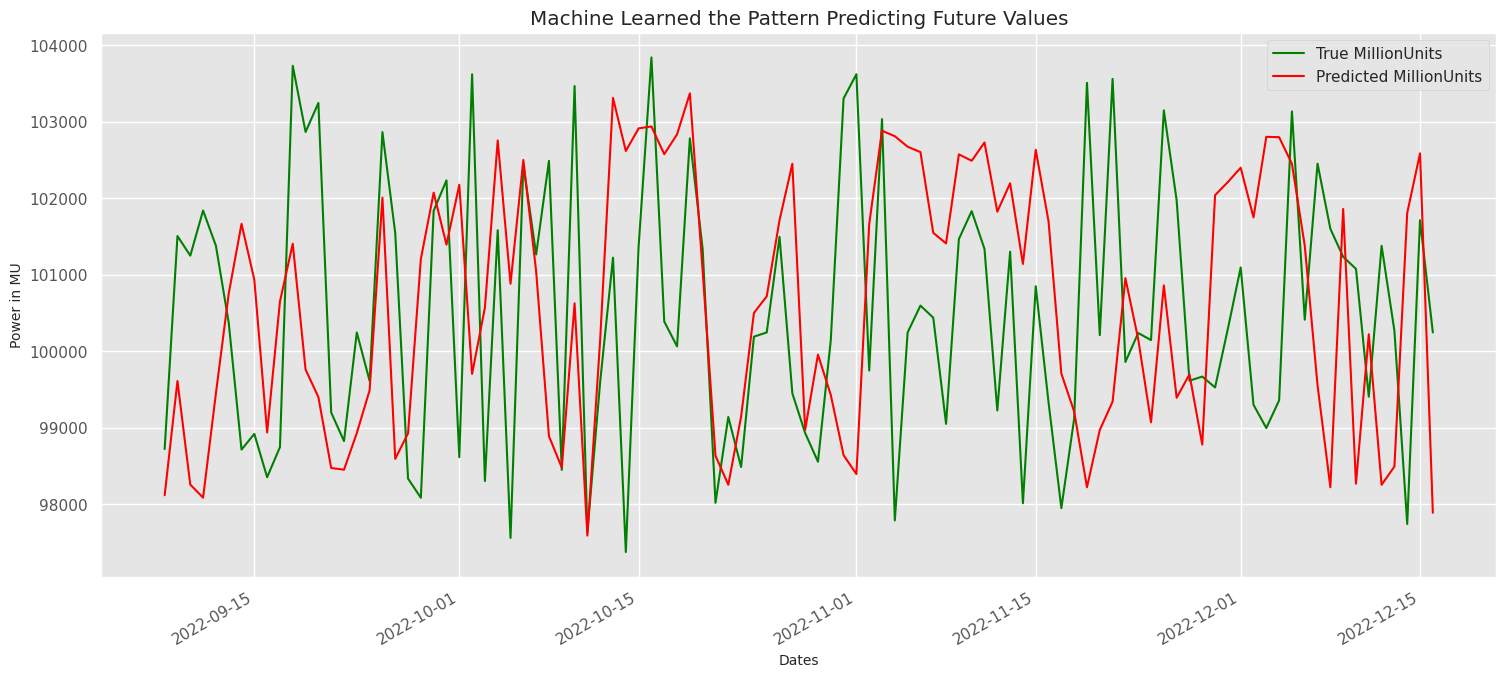

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MillionUnits
y1 = Predicted_MillionUnits

plt.plot(x, y, color="green", label="True MillionUnits")
plt.plot(x, y1, color="red", label="Predicted MillionUnits")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MU")
plt.title("Machine Learned the Pattern Predicting Future Values")

# Add legend
plt.legend()

plt.show()


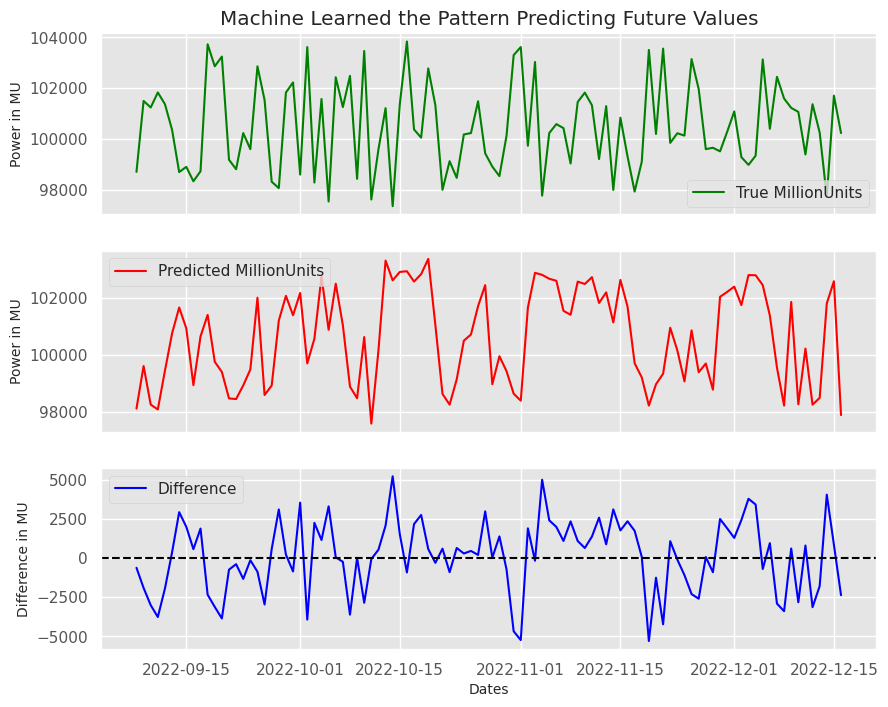

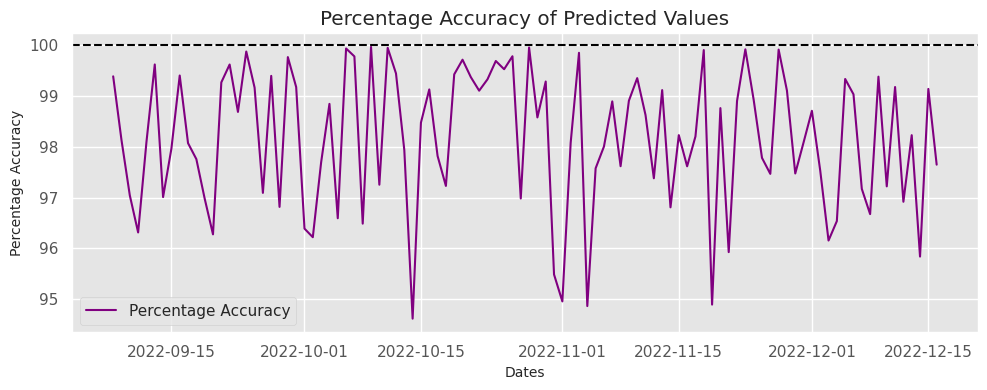

In [58]:
True_MillionUnits = TestData["Consumption"].to_list()
Predicted_MillionUnits = [x[0] for x in Predicted_MillionUnits]
dates = TestData.index.to_list()

# Calculate the difference between predicted and true values
difference = [predicted - true for predicted, true in zip(Predicted_MillionUnits, True_MillionUnits)]

# Calculate percentage accuracy
percentage_accuracy = [(1 - abs(d / t)) * 100 if t != 0 else 100 for d, t in zip(difference, True_MillionUnits)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot true values
ax1.plot(dates, True_MillionUnits, color="green", label="True MillionUnits")
ax1.set_ylabel("Power in MU")
ax1.set_title("Machine Learned the Pattern Predicting Future Values")
ax1.legend()

# Plot predicted values
ax2.plot(dates, Predicted_MillionUnits, color="red", label="Predicted MillionUnits")
ax2.set_ylabel("Power in MU")
ax2.legend()

# Plot difference
ax3.plot(dates, difference, color="blue", label="Difference")
ax3.set_xlabel('Dates')
ax3.set_ylabel("Difference in MU")
ax3.axhline(0, color="black", linestyle="--")  # Add a horizontal line at y=0
ax3.legend()

# Plot percentage accuracy
fig, ax4 = plt.subplots(figsize=(10, 4))
ax4.plot(dates, percentage_accuracy, color="purple", label="Percentage Accuracy")
ax4.set_xlabel('Dates')
ax4.set_ylabel("Percentage Accuracy")
ax4.set_title("Percentage Accuracy of Predicted Values")
ax4.axhline(100, color="black", linestyle="--")  # Add a horizontal line at y=100
ax4.legend()

plt.tight_layout()
plt.show()


## Resampling Data
Renewable Energy

In [59]:
NewDataSet = dataset.resample('D').mean()

/tmp/ipykernel_6664/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [61]:
NewDataSet
df = NewDataSet

In [62]:
# Calculate the mean and standard deviation of the electricity consumption column
meanr = df['Total RE Generated (Energy Saved)'].mean()
stdr = df['Total RE Generated (Energy Saved)'].std()

# Generate random values based on a normal distribution using the mean and standard deviation
random_valuesr = np.random.normal(meanr, stdr, df['Total RE Generated (Energy Saved)'].isnull().sum())

# Replace NaN values with the generated random values
df.loc[df['Total RE Generated (Energy Saved)'].isnull(), 'Total RE Generated (Energy Saved)'] = random_valuesr

# Print the updated DataFrame
# df.head(50)
NewDataSet = df

In [63]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,1:2]

Training_Set = Training_Set[:-60]

In [64]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1636, 1)
Test Set Shape  (100, 5)


In [65]:
print(Training_Set)

            Total RE Generated (Energy Saved)
Datetime                                     
2018-04-26                        8443.790000
2018-04-27                       12012.007569
2018-04-28                       15151.094254
2018-04-29                       17099.038227
2018-04-30                       17989.968654
...                                       ...
2022-10-13                       13810.781134
2022-10-14                       10686.119572
2022-10-15                       10952.649020
2022-10-16                        9536.191942
2022-10-17                       11012.437435

[1636 rows x 1 columns]


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [68]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)


(1576, 60, 1)
(1576, 1)


In [69]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1576, 60, 1)

In [70]:
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


2023-05-28 13:26:38.994433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 13:26:38.996226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 13:26:38.997431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [71]:
regressor.fit(X_Train, Y_Train, epochs = 1000, batch_size = 64)

Epoch 1/1000


2023-05-28 13:26:40.035181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 13:26:40.037136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 13:26:40.038918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 10s 114ms/step - loss: 0.0558
Epoch 2/1000
25/25 [==============================] - 4s 151ms/step - loss: 0.0287
Epoch 3/1000
25/25 [==============================] - 4s 143ms/step - loss: 0.0271
Epoch 4/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0279
Epoch 5/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0268
Epoch 6/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0280
Epoch 7/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0271
Epoch 8/1000
25/25 [==============================] - 3s 133ms/step - loss: 0.0265
Epoch 9/1000
25/25 [==============================] - 5s 186ms/step - loss: 0.0264
Epoch 10/1000
25/25 [==============================] - 3s 126ms/step - loss: 0.0264
Epoch 11/1000
25/25 [==============================] - 3s 124ms/step - loss: 0.0265
Epoch 12/1000
25/25 [==============================] - 4s 152ms/step - loss: 0.0266
Epoch 13/1000

25/25 [==============================] - 3s 103ms/step - loss: 0.0246
Epoch 195/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0246
Epoch 196/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0246
Epoch 197/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0244
Epoch 198/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0247
Epoch 199/1000
25/25 [==============================] - 3s 112ms/step - loss: 0.0246
Epoch 200/1000
25/25 [==============================] - 3s 117ms/step - loss: 0.0246
Epoch 201/1000
25/25 [==============================] - 3s 117ms/step - loss: 0.0248
Epoch 202/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0245
Epoch 203/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0246
Epoch 204/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0245
Epoch 205/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.

25/25 [==============================] - 3s 103ms/step - loss: 0.0240
Epoch 387/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0237
Epoch 388/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0239
Epoch 389/1000
25/25 [==============================] - 2s 99ms/step - loss: 0.0242
Epoch 390/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0242
Epoch 391/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0239
Epoch 392/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.0237
Epoch 393/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0239
Epoch 394/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0238
Epoch 395/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0236
Epoch 396/1000
25/25 [==============================] - 3s 100ms/step - loss: 0.0239
Epoch 397/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0

25/25 [==============================] - 3s 104ms/step - loss: 0.0194
Epoch 579/1000
25/25 [==============================] - 7s 284ms/step - loss: 0.0186
Epoch 580/1000
25/25 [==============================] - 9s 340ms/step - loss: 0.0190
Epoch 581/1000
25/25 [==============================] - 9s 351ms/step - loss: 0.0186
Epoch 582/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0185
Epoch 583/1000
25/25 [==============================] - 3s 111ms/step - loss: 0.0192
Epoch 584/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0183
Epoch 585/1000
25/25 [==============================] - 3s 110ms/step - loss: 0.0186
Epoch 586/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0192
Epoch 587/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0186
Epoch 588/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0190
Epoch 589/1000
25/25 [==============================] - 3s 101ms/step - loss: 0.

25/25 [==============================] - 3s 102ms/step - loss: 0.0102
Epoch 771/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0096
Epoch 772/1000
25/25 [==============================] - 3s 104ms/step - loss: 0.0095
Epoch 773/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0095
Epoch 774/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0104
Epoch 775/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0091
Epoch 776/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0090
Epoch 777/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0090
Epoch 778/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0090
Epoch 779/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.0094
Epoch 780/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0089
Epoch 781/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.

25/25 [==============================] - 3s 105ms/step - loss: 0.0053
Epoch 963/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0048
Epoch 964/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0053
Epoch 965/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0049
Epoch 966/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0053
Epoch 967/1000
25/25 [==============================] - 3s 107ms/step - loss: 0.0047
Epoch 968/1000
25/25 [==============================] - 3s 108ms/step - loss: 0.0051
Epoch 969/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0050
Epoch 970/1000
25/25 [==============================] - 3s 103ms/step - loss: 0.0051
Epoch 971/1000
25/25 [==============================] - 3s 105ms/step - loss: 0.0047
Epoch 972/1000
25/25 [==============================] - 3s 106ms/step - loss: 0.0046
Epoch 973/1000
25/25 [==============================] - 3s 102ms/step - loss: 0.

## Test Data

In [72]:
TestData.head(2)

,Consumption,Total RE Generated (Energy Saved),Month,Year,Week
Datetime,,,,,
2022-09-08,NaN,15785.859521,NaN,NaN,NaN
2022-09-09,NaN,7654.912625,NaN,NaN,NaN


In [73]:
TestData.shape

(100, 5)

In [74]:
NewDataSet.shape

(1696, 5)

In [75]:
Df_Total = pd.concat((NewDataSet[["Total RE Generated (Energy Saved)"]], TestData[["Total RE Generated (Energy Saved)"]]), axis=0)

In [76]:
Df_Total.shape

(1796, 1)

In [77]:
Df_Total

,Total RE Generated (Energy Saved)
Datetime,
2018-04-26,8443.790000
2018-04-27,12012.007569
2018-04-28,15151.094254
2018-04-29,17099.038227
2018-04-30,17989.968654
...,...
2022-12-12,12921.892528
2022-12-13,10247.049869
2022-12-14,9692.313437


In [78]:
Df_Total.fillna(0, inplace=True)

In [79]:
Df_Total

,Total RE Generated (Energy Saved)
Datetime,
2018-04-26,8443.790000
2018-04-27,12012.007569
2018-04-28,15151.094254
2018-04-29,17099.038227
2018-04-30,17989.968654
...,...
2022-12-12,12921.892528
2022-12-13,10247.049869
2022-12-14,9692.313437


In [80]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [81]:
inputs

array([[10314.10619817],
       [ 8841.06168262],
       [15639.15756196],
       [13648.33551759],
       [17177.46569104],
       [18013.56067349],
       [11387.93660787],
       [14238.57      ],
       [ 7538.86511647],
       [12313.13363206],
       [13766.09080221],
       [12641.32351196],
       [15677.62847742],
       [11950.46194017],
       [11409.27551218],
       [14433.82962201],
       [10937.33556903],
       [11515.20959196],
       [13393.43      ],
       [16168.76072898],
       [10081.02669391],
       [14157.68905248],
       [11828.61249949],
       [17250.73750952],
       [ 9110.14598341],
       [17266.09209813],
       [13899.89736447],
       [14172.4009491 ],
       [12809.15936299],
       [10243.1399466 ],
       [15445.40959435],
       [13864.69565183],
       [ 8834.7837464 ],
       [10660.53116302],
       [ 7613.70945819],
       [11781.15457662],
       [10181.96655425],
       [10445.26637328],
       [ 9285.15976454],
       [11729.81375703],


In [82]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

In [83]:
# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2023-05-28 14:49:25.672348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 14:49:25.682131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 14:49:25.686743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 4s 35ms/step


In [90]:
True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
Predicted_MillionUnits  = predicted_stock_price
dates = TestData.index.to_list()


In [85]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMillionUnits": True_MillionUnits,
    "PredictedMillionUnits":[x[0] for x in Predicted_MillionUnits ]
})

## Future Predicted

In [86]:
Machine_Df

,Date,TrueMillionUnits,PredictedMillionUnits
0,2022-09-08,15785.859521,15240.583008
1,2022-09-09,7654.912625,11900.545898
2,2022-09-10,18855.469430,15097.294922
3,2022-09-11,14946.675731,13125.358398
4,2022-09-12,7711.048137,9918.247070
...,...,...,...
95,2022-12-12,12921.892528,13026.999023
96,2022-12-13,10247.049869,11954.367188
97,2022-12-14,9692.313437,10806.637695
98,2022-12-15,15387.162158,11613.538086


In [87]:
True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
Predicted_MillionUnits  = [x[0] for x in Predicted_MillionUnits ]
dates = TestData.index.to_list()

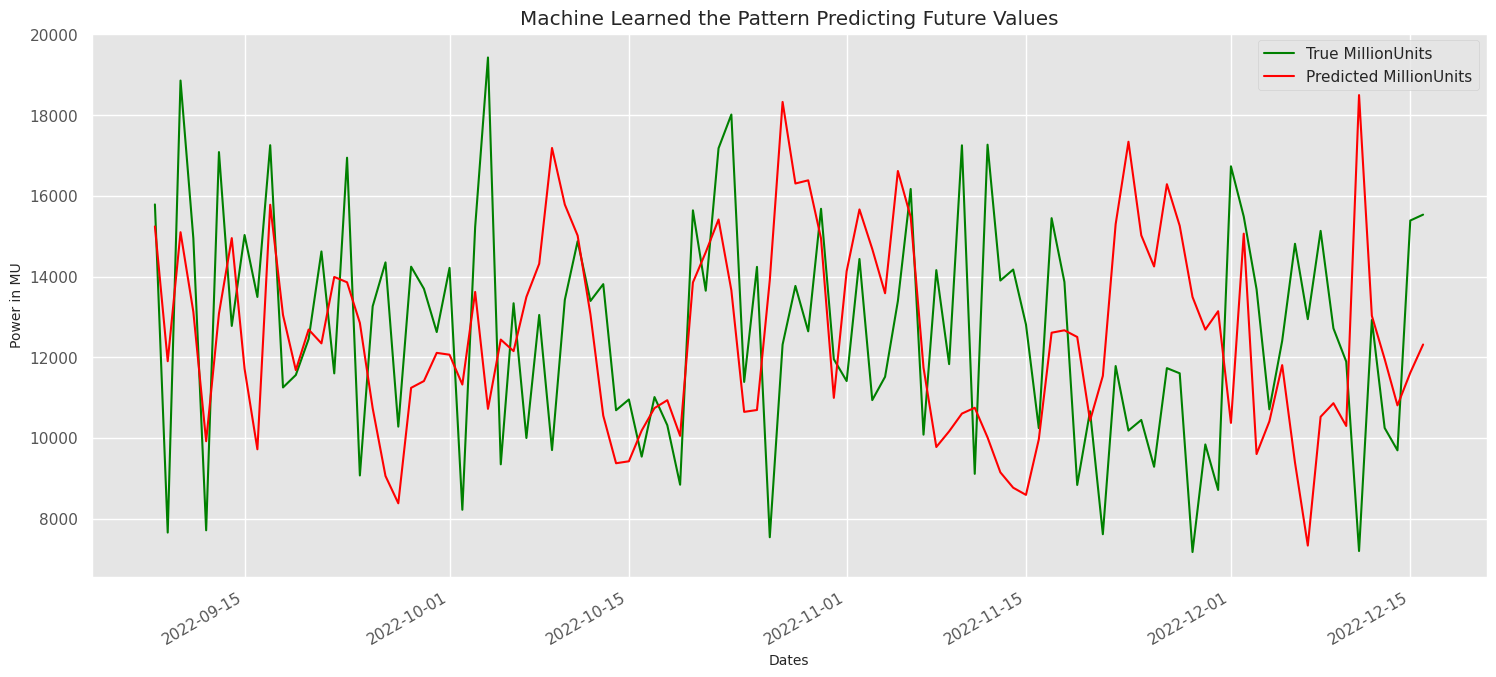

In [88]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MillionUnits
y1 = Predicted_MillionUnits

plt.plot(x, y, color="green", label="True MillionUnits")
plt.plot(x, y1, color="red", label="Predicted MillionUnits")

# Beautify the x-labels
plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MU")
plt.title("Machine Learned the Pattern Predicting Future Values")

# Add legend
plt.legend()

plt.show()

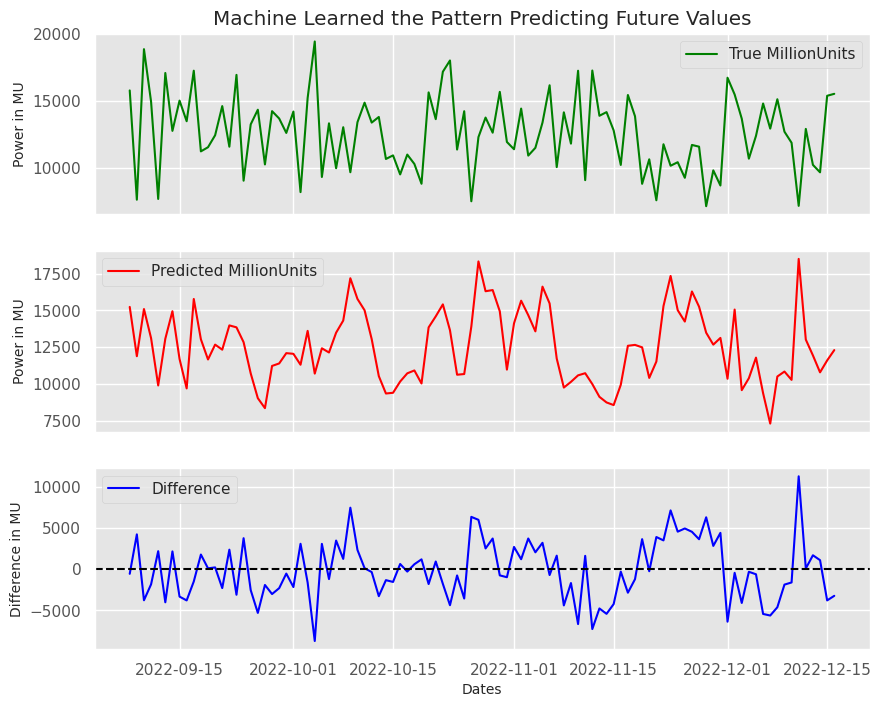

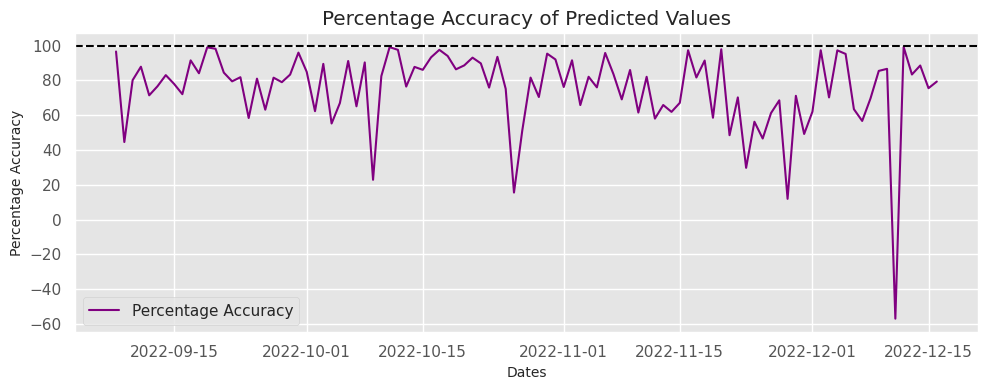

In [91]:
True_MillionUnits = TestData["Total RE Generated (Energy Saved)"].to_list()
Predicted_MillionUnits = [x[0] for x in Predicted_MillionUnits]
dates = TestData.index.to_list()

# Calculate the difference between predicted and true values
difference = [predicted - true for predicted, true in zip(Predicted_MillionUnits, True_MillionUnits)]

# Calculate percentage accuracy
percentage_accuracy = [(1 - abs(d / t)) * 100 if t != 0 else 100 for d, t in zip(difference, True_MillionUnits)]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot true values
ax1.plot(dates, True_MillionUnits, color="green", label="True MillionUnits")
ax1.set_ylabel("Power in MU")
ax1.set_title("Machine Learned the Pattern Predicting Future Values")
ax1.legend()

# Plot predicted values
ax2.plot(dates, Predicted_MillionUnits, color="red", label="Predicted MillionUnits")
ax2.set_ylabel("Power in MU")
ax2.legend()

# Plot difference
ax3.plot(dates, difference, color="blue", label="Difference")
ax3.set_xlabel('Dates')
ax3.set_ylabel("Difference in MU")
ax3.axhline(0, color="black", linestyle="--")  # Add a horizontal line at y=0
ax3.legend()

# Plot percentage accuracy
fig, ax4 = plt.subplots(figsize=(10, 4))
ax4.plot(dates, percentage_accuracy, color="purple", label="Percentage Accuracy")
ax4.set_xlabel('Dates')
ax4.set_ylabel("Percentage Accuracy")
ax4.set_title("Percentage Accuracy of Predicted Values")
ax4.axhline(100, color="black", linestyle="--")  # Add a horizontal line at y=100
ax4.legend()

plt.tight_layout()
plt.show()